<a href="https://colab.research.google.com/github/emcgeever-husky/Econ3916/blob/main/Lab%205/The%20Monte%20Carlo%20Casino%20ibpyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

55524 -- Attendance code

In [51]:
# initialize libraries
import numpy as np
import matplotlib.pyplot as plt

## The Law of Large Numbers

In [52]:
def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

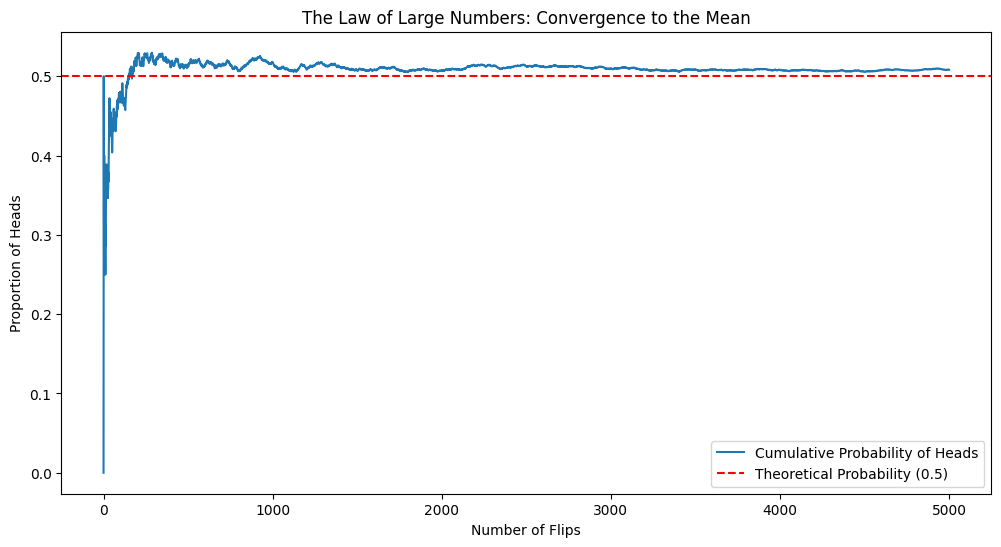

In [53]:
# Run the simulation
simulate_law_of_large_numbers(5000)

## The Monty Hall Simulation

In [54]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open the 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 32.65%
Win Rate (Switch): 67.35%


## SaaS Business Risk (VaR)

Probability of Revenue Decline: 17.52%
95% Value at Risk (Worst Case): $9,605,473.36


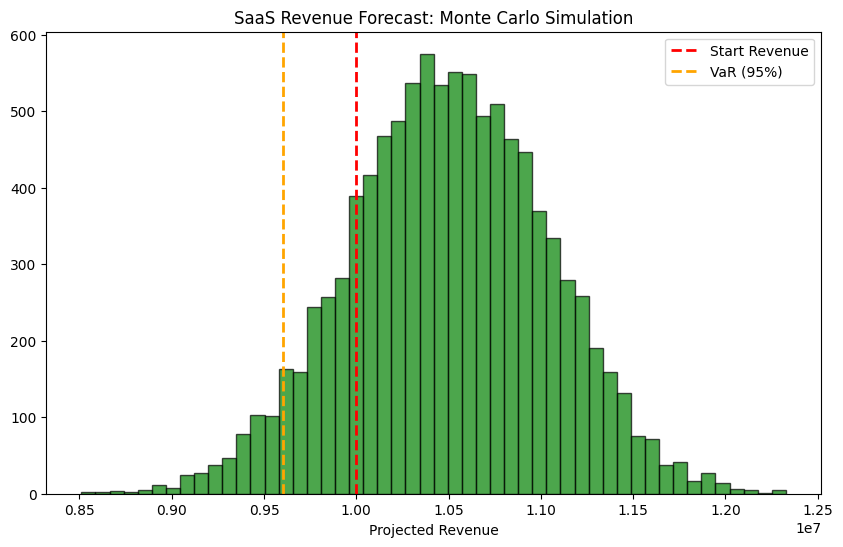

In [55]:
def saas_risk_model(n_sims):
    base_rev = 10000000

    # Stochastic Inputs
    # Centered at 10% but varies with a SD of 2%
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # What is the probability that we end the year with less $ than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

## The "Fat Tail" Stress Test

SaaS Monte Carlo model but using a Student's t-distribution (which has heavier tails/more outliers, showing market likeliness to more extreme outcomes)

Probability of Revenue Decline: 20.64%
95% Value at Risk (Worst Case): $9,291,161.90


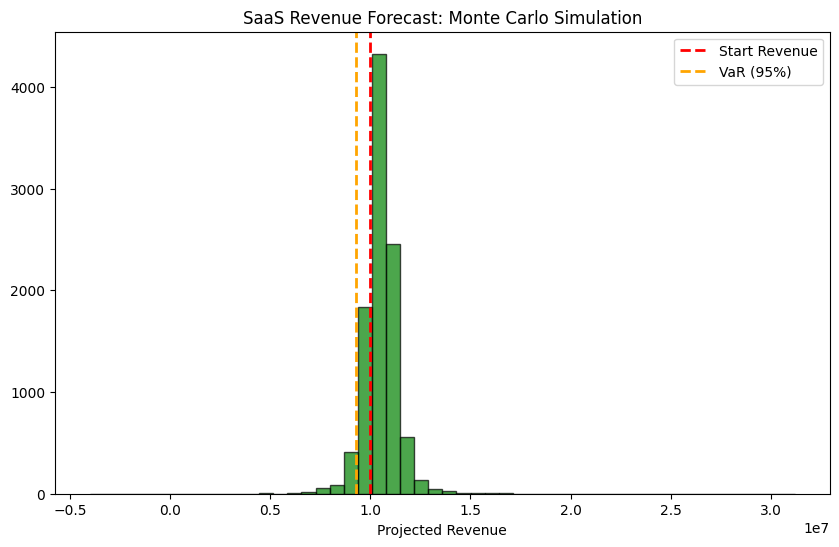

In [56]:
def saas_risk_model(n_sims):
    base_rev = 10000000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    # New Sales using Student's t-distribution (introducing heavy tails)
    t_random = np.random.standard_t(df=3, size=n_sims)
    # scale to sales figures
    sales_sims = 1_500_000 + t_random * 500_000

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

In [57]:
## Comparing VaR (5th percentile) for the Normal model vs. the Fat Tail model

In [60]:
def saas_var_comparison(n_sims):
    base_rev = 10000000

    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    # -------- Normal Sales Model --------
    sales_normal = np.random.normal(1_500_000, 500_000, n_sims)
    net_rev_normal = base_rev * (1 - churn_sims) + sales_normal
    var_normal = np.percentile(net_rev_normal, 5)

    # -------- Fat-Tail Sales Model --------
    t_random = np.random.standard_t(df=3, size=n_sims)
    sales_fat = 1_500_000 + t_random * 500_000
    net_rev_fat = base_rev * (1 - churn_sims) + sales_fat
    var_fat = np.percentile(net_rev_fat, 5)

    print("5% Value at Risk Comparison")
    print("---------------------------")
    print(f"Normal Sales VaR:   ${var_normal:,.0f}")
    print(f"Fat-Tail Sales VaR: ${var_fat:,.0f}")

    return var_normal, var_fat

saas_var_comparison(10000)

5% Value at Risk Comparison
---------------------------
Normal Sales VaR:   $9,628,061
Fat-Tail Sales VaR: $9,256,687


(np.float64(9628061.459900107), np.float64(9256686.979235422))

In [59]:
## Mock memo

To: Chief Risk Officer,

**Main point:** fat-tailed revenue model implies a higher capital reserve requirement than the Normal-based model. We must increase this requirement.

**In depth:**  Under the Normal model, extreme negative sales outcomes are very unlikely, causing downside risk to be understated. In contrast, the fat-tailed Student’s t-distribution explicitly allows for rare but severe sales shortfalls. As a result, the left tail of the revenue distribution is wider and heavier, reflecting real-world volatility observed in SaaS businesses.



